## Machine learning Algorithm Trader

In this project, we will be using the OANDA v20 REST API  

<img style="float: left;" src="./images/api.png">




# Why forex over stocks?


![3advantage](./images/lvts.png)

### Liquidity  
The forex market is the largest and most liquid financial market. Daily activity often exceeds 4 trillion USD, with over 1.5 trillion of that conducted in the form of spot trading.


### Volatility  
Volatility boosts opportunity due to exchange rate fluctuations. Forex trading operates 24 hours a day, 5 days a week. The greatest liquidity occurs when operational hours in multiple time zones overlap.


### Tight Spreads  
Spreads in the forex market tend to be tighter (less), than the spreads applied to other, securities such as stocks. This makes OTC forex trading one of the most cost - effective means of investment trading.

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import tensorflow as tf
import keras
import pickle as pkl
import shap

import warnings
warnings.filterwarnings("ignore")
# plt.style.use("seaborn")

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)




# import tpqoa
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# import random
# from keras.layers import Dense, Dropout
# from keras.models import Sequential, load_model
# from keras.regularizers import l1, l2
# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# import seaborn as sns
# import joblib
# import eli5
# from eli5.sklearn import PermutationImportance
# from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix



In [2]:
Z_train = pd.read_pickle("datasets/Z_train.pkl")
cols = pkl.load(open("datasets/cols.pkl", "rb"))
X = Z_train[cols]
Z_test = pd.read_pickle("datasets/Z_test.pkl")

## SHAP


In [3]:
#loading model
DNN_model = keras.models.load_model("datasets/DNN_model")

In [4]:
explainer = shap.KernelExplainer(DNN_model.predict, X.loc['2020-09-01':'2020-09-01'])
shap_values = explainer.shap_values(Z_test[cols].loc['2022-08-01':'2022-08-01'])

8/8 [==============================] - 0s 2ms/step


Using 232 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/288 [00:00<?, ?it/s]

15428/15428 [==============================] - 23s 1ms/step


15428/15428 [==============================] - 28s 2ms/step


In [5]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.force_plot(explainer.expected_value[0], shap_values[0][0], features =  cols)

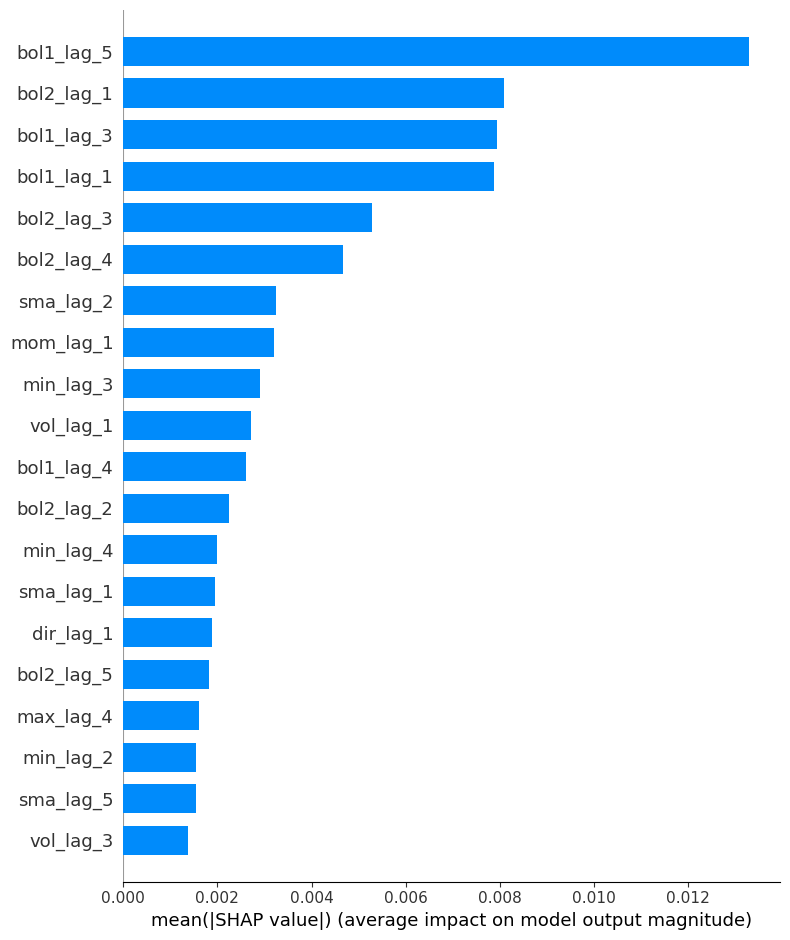

In [6]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = cols)

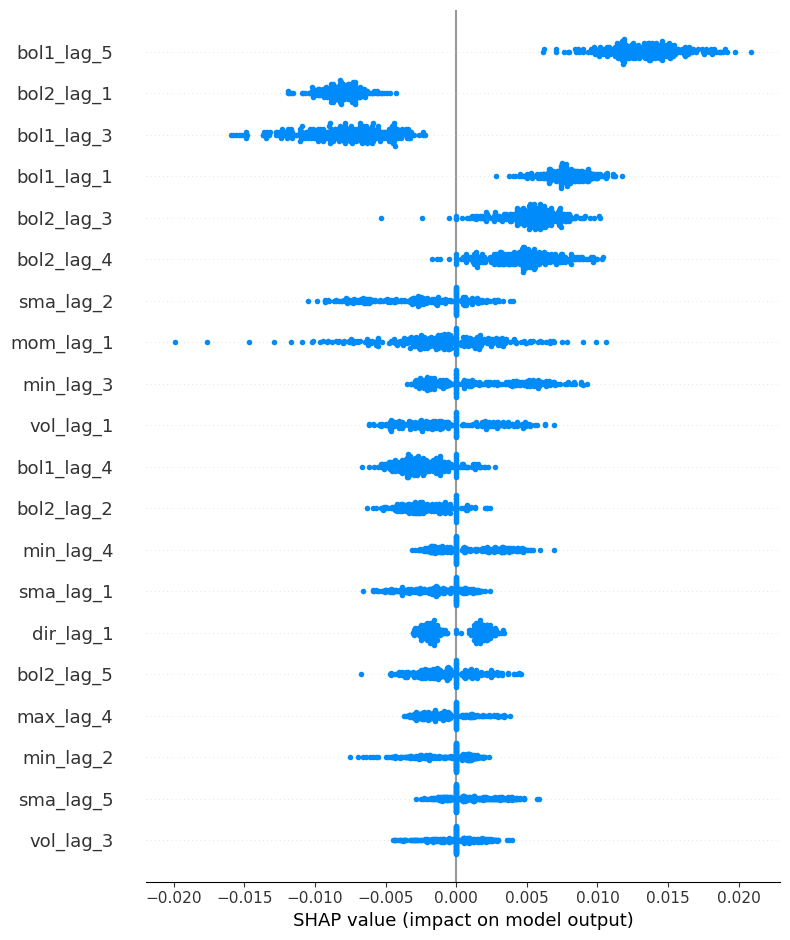

In [7]:
shap.summary_plot(shap_values[0], feature_names = cols)